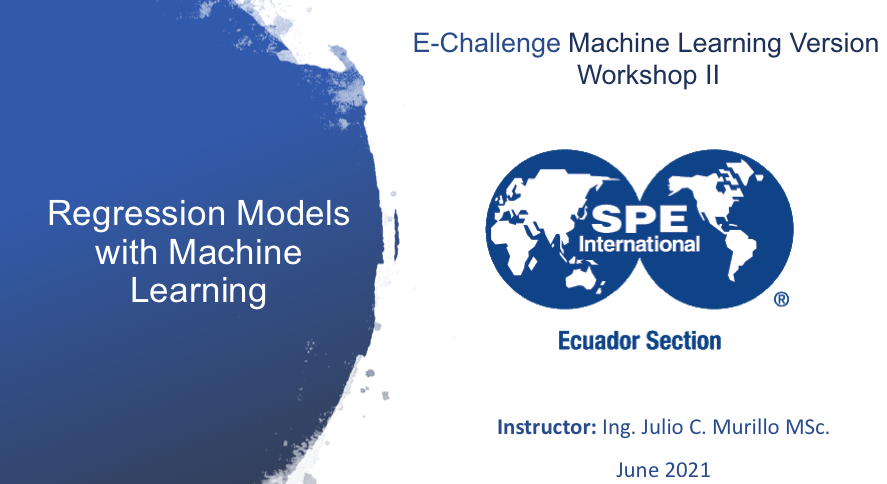

In [2]:
from IPython.display import clear_output 
clear_output()

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AEo7Bsaq5Eno1oXz-dMMpYJ9eNYeUZcX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1AEo7Bsaq5Eno1oXz-dMMpYJ9eNYeUZcX" -O Well_4.las && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18KeXumqA17_0Nkx0JrDxw9ellUtFGFqK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18KeXumqA17_0Nkx0JrDxw9ellUtFGFqK" -O Well_3.las && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WASCmWGSXOH-KhnlOiX3CfiOoZfZAO6C' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WASCmWGSXOH-KhnlOiX3CfiOoZfZAO6C" -O Well_2.las && rm -rf /tmp/cookies.txt

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Z0Sz8kyayhFonWDWoMS2Mt2ijnYjffeA' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Z0Sz8kyayhFonWDWoMS2Mt2ijnYjffeA" -O Well_1.las && rm -rf /tmp/cookies.txt

clear_output()

## **1. Importar librerias**

In [3]:
!pip install lasio
!pip install plotly_express
!pip install --upgrade hvplot
!pip install --upgrade bokeh
!pip install --upgrade holoviews 
!pip install ax-platform


clear_output()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import lasio as ls
import plotly_express as px
import hvplot
import hvplot.pandas
import holoviews as hv
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")

## **2. Cargar data**

In [5]:
file_path_1 = 'Well_1.las'
file_path_2 = 'Well_2.las'
file_path_3 = 'Well_3.las'
file_path_4 = 'Well_4.las'

In [6]:
def load_las_to_df(file_path):
    las = ls.read(file_path) # Leer el archivo desde el directorio espeficicado anteriormente.
    wellname = las.well.WELL.value # 1er Edición: Quiero añadir una columna con el nombre del pozo.
    df = las.df() # Tranformación de archivo LAS a Data Frame
    df.reset_index(inplace = True) # Pandas genera automatica indices, con este paso, reseteamos esa opción.
    df['Well'] = wellname # añado la nueva columna con los valores espeficados en wellname.
    return df; # Finalmente, presenta los datos de la función df.

In [7]:
raw_w1 = load_las_to_df(file_path_1) 
raw_w2 = load_las_to_df(file_path_2) 
raw_w3 = load_las_to_df(file_path_3) 
raw_w4 = load_las_to_df(file_path_4) 

## **3. Editar & Limpiar Data**

In [8]:
print(raw_w1.keys())
print(raw_w2.keys())
print(raw_w3.keys())
print(raw_w4.keys())

Index(['DEPTH', 'TVD', 'ROP_AVG', 'TCDM', 'BITSIZE', 'GRCM', 'GRCFM', 'GR1BFM',
       'GR2BFM', 'GR1AFM', 'GR2AFM', 'RACHM', 'RPCHM', 'RPTHM', 'ACTECDM',
       'APRESM', 'BRAM', 'BDCFM', 'BDCM', 'CALCFM', 'NPLFM', 'NPLM', 'DPEM',
       'DRHM', 'DRHFM', 'DPEFM', 'CALCX', 'BDCX', 'DRHX', 'TCDX', 'GR2CX',
       'ACTECDX', 'APRESX', 'RACHX', 'RPCHX', 'NPLX', 'Well'],
      dtype='object')
Index(['DEPTH', 'TVD', 'ROP_AVG', 'TCDM', 'BITSIZE', 'GRIM', 'GR1BFM',
       'GR2BFM', 'GR1AFM', 'GR2AFM', 'GRCM', 'GRCFM', 'RPCHM', 'RACHM',
       'RPHIM', 'BDCFM', 'BDIM', 'DRHFM', 'DPEM', 'DPEFM', 'NPLM', 'NPCLM',
       'NPLFM', 'NPCLFM', 'NPCSM', 'NPSFM', 'NPCSFM', 'NPIM', 'NFBM', 'NNGM',
       'CALCFM', 'APRESM', 'ACTECDM', 'DTC', 'SVLM', 'Well'],
      dtype='object')
Index(['DEPT', 'DEPTH', 'TVD', 'ROP5', 'CRPM', 'GR:1', 'GR:2', 'RES_BIT',
       'A16H', 'A22H', 'A28H', 'A34H', 'A40H', 'A16L', 'A22L', 'A28L', 'A34L',
       'A40L', 'P16H', 'P16L', 'P22H', 'P22L', 'P28H', 'P28L', 'P34H', 'P3

In [9]:
# Eliminar Variables
raw_w1 = raw_w1.drop(columns=['TVD', 'ROP_AVG', 'TCDM', 'BITSIZE', 'GRCFM', 'GR1BFM',
                              'GR2BFM', 'GR1AFM', 'GR2AFM', 'RACHM', 'RPTHM', 'ACTECDM',
                              'APRESM', 'BRAM', 'BDCFM', 'NPLFM',
                              'DRHM', 'DRHFM', 'CALCX', 'BDCX', 'DRHX', 'TCDX', 'GR2CX',
                              'ACTECDX', 'APRESX', 'RACHX', 'RPCHX', 'NPLX' ])
raw_w2 = raw_w2.drop(columns=['TVD', 'ROP_AVG', 'TCDM', 'BITSIZE', 'GRIM', 'GR1BFM',
                              'GR2BFM', 'GR1AFM', 'GR2AFM', 'GRCM', 'RACHM',
                              'RPHIM', 'BDIM', 'DRHFM', 'NPCLM', 'NPCLFM', 'NPCSM', 'NPSFM', 
                              'NPIM', 'NFBM', 'APRESM', 'ACTECDM', 'DTC', 'NPLM'])
raw_w3 = raw_w3.drop(columns=['DEPTH', 'TVD', 'ROP5', 'CRPM', 'GR:2', 'RES_BIT', 
                              'A22H', 'A28H', 'A34H', 'A22L', 'A28L', 'A34L', 
                              'P16H', 'P16L', 'P22H', 'P22L', 'P28H', 'P28L', 'P34H', 'P34L',
                              'P40H', 'P40L', 'DHAT', 'DHAP', 'ECD', 'DRHO', 'ADIA', 
                              'TAB_RES', 'TAB_DEN', 'TAB_NEU', 'TAB_RES_BIT'])
raw_w4 = raw_w4.drop(columns=['DEPTH', 'TVD', 'ROP5', 'CRPM', 'GR:2', 'RES_BIT', 
                              'A22H', 'A28H', 'A34H', 'A22L', 'A28L', 'A34L', 
                              'P16H', 'P16L', 'P22H', 'P22L', 'P28H', 'P28L', 'P34H', 'P34L',
                              'P40H', 'P40L', 'DHAT', 'DHAP', 'ECD', 'DRHO', 'ADIA', 
                              'TAB_RES', 'TAB_DEN', 'TAB_NEU', 'TAB_RES_BIT', 'A16H','A16L', 'A40L'])

In [10]:
# Renombrar Variables
raw_w1 = raw_w1.rename(columns ={'RPCHM':'RT','GRCM':'GR', 'BDCM':'RHOB', 'NPLM':'NPHI', 'DPEFM':'PE', 'CALCFM':'CAL'}, inplace=False)
raw_w2 = raw_w2.rename(columns ={'RPCHM':'RT', 'BDCFM':'RHOB', 'DPEM':'PE', 'NPCSFM':'NPHI', 'CALCFM':'CAL', 'GRCFM':'GR'}, inplace=False)
raw_w3 = raw_w3.rename(columns ={'GR:1':'GR', 'DEPT':'DEPTH', 'A16H':'RS', 'A40H':'RT', 'PEF': 'PE', 'TNPH': 'NPHI', 'DCAV':'CAL'}, inplace=False)
raw_w4 = raw_w4.rename(columns ={'GR:1':'GR', 'DEPT':'DEPTH', 'A40H':'RT', 'PEF': 'PE', 'TNPH': 'NPHI', 'DCAV':'CAL'}, inplace=False)

In [11]:
drop_rows_1 = raw_w1[(raw_w1['DEPTH'] < 4000) ].index
drop_rows_2 = raw_w2[(raw_w2['DEPTH'] < 4000) ].index
drop_rows_3 = raw_w3[(raw_w3['DEPTH'] < 4000) ].index
drop_rows_4 = raw_w3[(raw_w3['DEPTH'] < 4000) ].index
raw_w1.drop(drop_rows_1 , inplace=True)
raw_w2.drop(drop_rows_2 , inplace=True)
raw_w3.drop(drop_rows_3 , inplace=True)
raw_w4.drop(drop_rows_4 , inplace=True)

In [12]:
# Unir Pozos en un dataset
all_wells = pd.concat([raw_w1, raw_w2, raw_w3], join="inner")
all_wells = all_wells[["DEPTH", "GR", "CAL", "RT", "RHOB", "NPHI", "PE","Well"]]
all_wells.describe(include='all').transpose()

count unique        top  freq  ...      25%      50%      75%      max
DEPTH  6993    NaN        NaN   NaN  ...   4065.8   4131.6   4216.8   4307.4
GR     6761    NaN        NaN   NaN  ...  18.0025  40.4482   123.89  284.235
CAL    4258    NaN        NaN   NaN  ...  8.52303  8.62055   8.6693  9.00808
RT     6737    NaN        NaN   NaN  ...  16.8436  44.4409  89.2017  984.037
RHOB   5802    NaN        NaN   NaN  ...   2.5549   2.6129   2.6722  3.16429
NPHI   4046    NaN        NaN   NaN  ...  5.13762    6.749  12.9835  37.1033
PE     5794    NaN        NaN   NaN  ...  4.33707   5.0962  6.20017  21.3828
Well   6993      3  Barossa-3  3075  ...      NaN      NaN      NaN      NaN

[8 rows x 11 columns]

### **3.1. Visualización de Outliers**

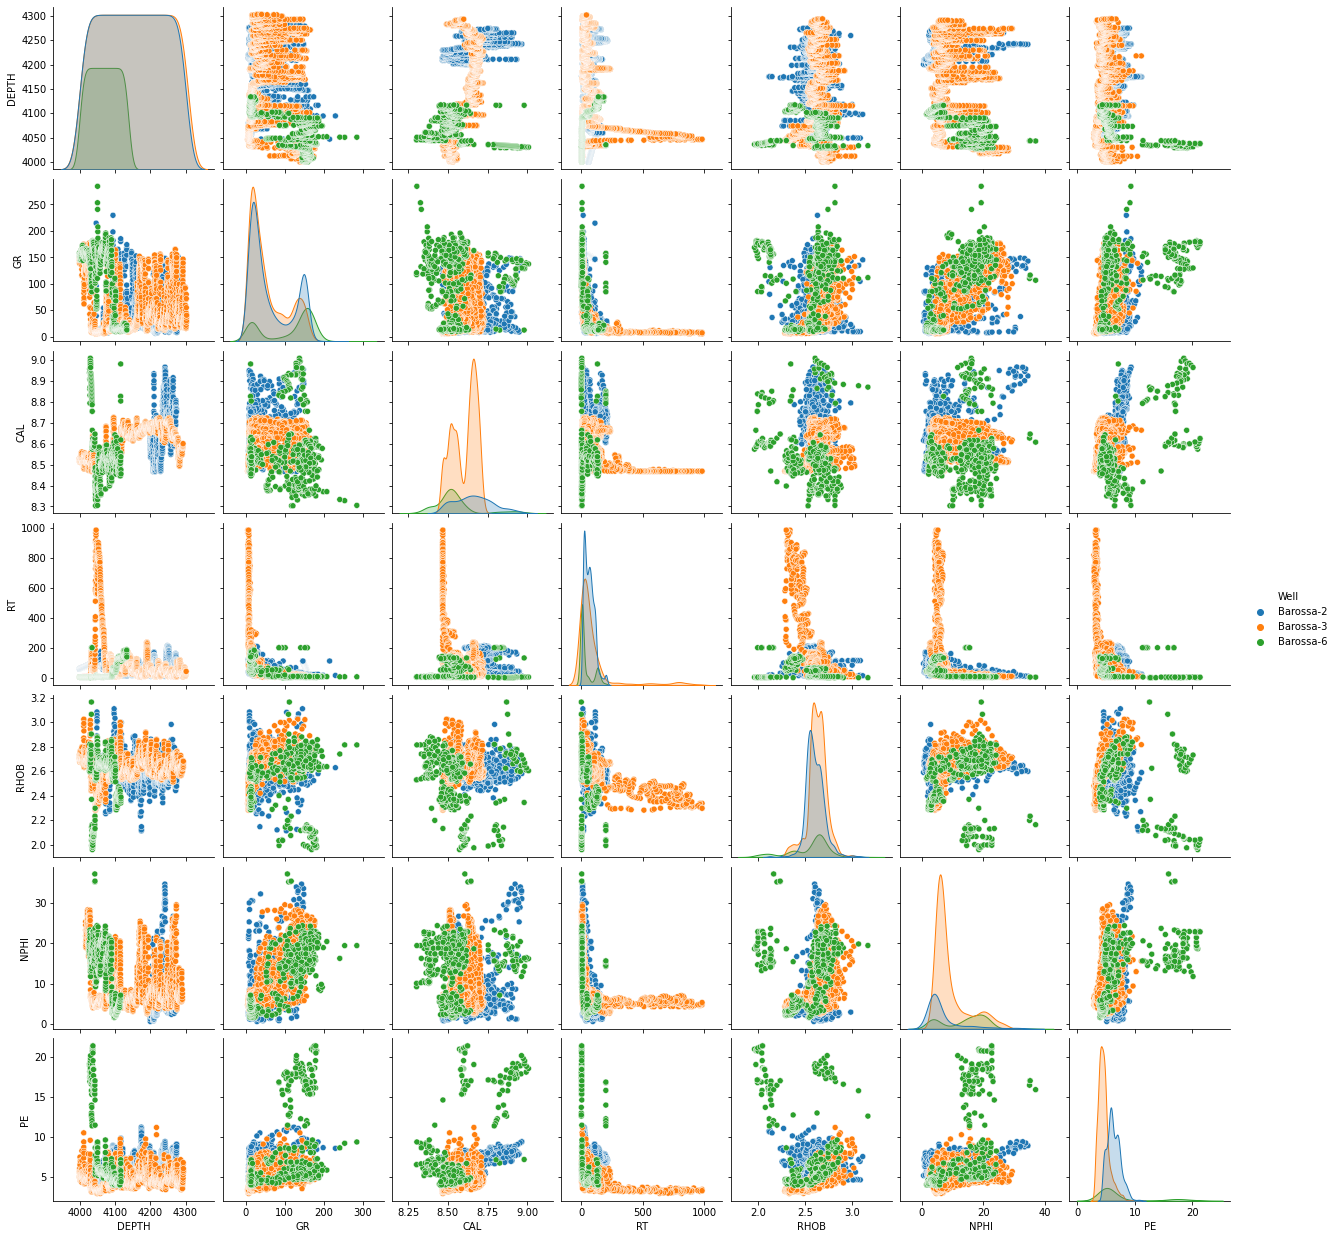

In [13]:
plot_1 = sn.pairplot(all_wells, hue = 'Well')

In [14]:
@interact
def boxplot(well= all_wells.Well.unique()):
    df_temp = all_wells[all_wells['Well'] == well]
    df_temp = df_temp.drop(['DEPTH', 'Well'], axis=1)
    f, axes = plt.subplots(len(df_temp.columns), 2, figsize=(8,25))

    for i, col in enumerate(df_temp.columns):
        ax1 = sn.boxplot(df_temp[col], ax = axes[i,1], palette='viridis')
        ax1 = sn.stripplot(df_temp[col], ax = axes[i,1], color="orange",jitter=0.2, size=4 )
        ax1.legend([col])
        ax1.set_xlabel('')
        
        ax2 = sn.distplot(df_temp[col], ax = axes[i,0])  
        ax2.legend([col])
        ax2.set_ylabel('')
        ax2.set_xlabel('')
        ax2.set_yticks([]) 

 

interactive(children=(Dropdown(description='well', options=('Barossa-2', 'Barossa-3', 'Barossa-6'), value='Bar…

## **3. Visualización de Pozos** 



In [15]:
well_names = all_wells['Well'].unique()

In [16]:
@interact
def boxdistplot(well= well_names):
    df = all_wells[all_wells['Well']==well]
    top_depth = df.DEPTH.min()
    bottom_depth = df.DEPTH.max()
    df = df.drop([ 'Well'], axis=1)
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,9), sharey=True)
    fig.suptitle("Registro Electrico" , fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)
    
    # Configuración de los Ejes
    for axes in ax:
      axes.set_ylim (top_depth, bottom_depth)
      axes.invert_yaxis()
      axes.yaxis.grid(True)
      axes.get_xaxis().set_visible(False)
    
    for i, col in enumerate(all_wells.columns):   

      #1st track: GR, SP, CALI track
      ax01=ax[0].twiny()
      ax01.set_xlim(6,36)
      ax01.set_xticks([6, 12, 18, 24, 30, 36])
      ax01.grid(True)
      ax01.plot(df.CAL, df.DEPTH, '--', label='CALI[in]', color='black') 
      ax01.spines['top'].set_position(('outward',45))
      ax01.set_xlabel('CALI[in]',color='black')    
      ax01.tick_params(axis='x', colors='black')
    
      ax02=ax[0].twiny()
      ax02.set_xlim(0,200)
      ax02.plot(df.GR, df.DEPTH, label='GR[api]', color='green') 
      ax02.spines['top'].set_position(('outward',85))
      ax02.set_xlabel('GR[API]',color='green')    
      ax02.tick_params(axis='x', colors='green')

      #2nd track: Resistivities

      ax11=ax[1].twiny()
      ax11.set_xlim(0.1,100)
      ax11.set_xticks([0.1, 1.0, 10, 100, 1000])
      ax11.set_xscale('log')
      ax11.grid(True, which="both")
      ax11.spines['top'].set_position(('outward',5))
      ax11.set_xlabel('RT[m.ohm]', color='Blue')
      ax11.plot(df.RT, df.DEPTH, label='RT[m.ohm]', color='Blue')
      ax11.tick_params(axis='x', colors='Blue')    

      #3rd track: RHOB & NPHI
          
      ax21=ax[2].twiny()
      ax21.set_xlim(1.95,2.95)
      ax21.set_xticks([1.95, 2.15, 2.45, 2.65, 2.95])
      ax21.plot(df.RHOB, df.DEPTH ,label='RHOB[g/cc]', color='red') 
      ax21.grid(True)
      ax21.spines['top'].set_position(('outward',5))
      ax21.set_xlabel('RHOB[g/cc]',color='red')
      ax21.tick_params(axis='x', colors='red')

      ax22=ax[2].twiny()
      ax22.set_xlim(0.0,50)
      ax22.set_xticks([0, 10, 20, 30, 40, 50])
      ax22.invert_xaxis()
      ax22.plot(df.NPHI, df.DEPTH, label='NPHI[v/v]', color='green') 
      ax22.spines['top'].set_position(('outward',45))
      ax22.set_xlabel('NPHI[v/v]', color='green')    
      ax22.tick_params(axis='x', colors='green')

      #4rd track: PE

      ax31=ax[3].twiny()
      ax31.grid(True)
      ax31.set_xlim(0,10)
      ax31.set_xticks([0, 2, 4, 6, 8, 10])
      ax31.spines['top'].set_position(('outward',5))
      ax31.set_xlabel('PE[B/e]')
      ax31.plot(df.PE, df.DEPTH, label='PE[B/e]', color='m')
      ax31.set_xlabel('PE[B/e]', color='m')    
      ax31.tick_params(axis='x', colors='m')

      fig.tight_layout(pad = 2.0)

interactive(children=(Dropdown(description='well', options=('Barossa-2', 'Barossa-3', 'Barossa-6'), value='Bar…

## **4. Selección de Variables**

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
all_wells = all_wells.replace(np.nan, 0)
features = all_wells.drop(columns =['DEPTH', 'Well', 'PE'])
target = all_wells['PE'].values

In [24]:
def feature_selection(features, target , model = RandomForestRegressor()):
    model = model
    model.fit(features, target)
    importances = model.feature_importances_
    #std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
    indices = np.argsort(importances)[::-1]
    
    print("Feature Rankin:")
    
    for f in range(features.shape[1]):
        print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))
        
    plt.figure()
    plt.title("Variable selection", fontsize = 15)
    plt.bar(range(features.shape[1]), importances[indices], color = "blue", align = "center")
    plt.xticks(range(features.shape[1]), indices, fontsize =14)
    plt.yticks(fontsize = 14)
    plt.xlim([-1, features.shape[1]])
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Importances', fontsize = 14)
    plt.savefig('Feature Importance RFR Target_2.png',dpi=600)
    plt.show()

Feature Rankin:
1. feature 3 (0.743434)
2. feature 1 (0.126956)
3. feature 2 (0.084320)
4. feature 0 (0.029950)
5. feature 4 (0.015340)


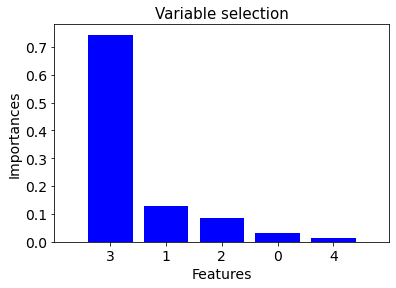

In [25]:
feature_selection(features, target , model = RandomForestRegressor())

In [26]:
features.columns

Index(['GR', 'CAL', 'RT', 'RHOB', 'NPHI'], dtype='object')

## **5. Estandarización & Splitting Data**

In [27]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# shuffle sirve para mezclar la información
df_new = all_wells.copy()
blind = raw_w4
df_new = shuffle(df_new)

In [29]:
df_new.describe()

DEPTH           GR  ...         NPHI           PE
count  6993.000000  6993.000000  ...  6993.000000  6993.000000
mean   4141.346855    63.684173  ...     5.500437     4.586505
std      87.784270    55.487984  ...     6.725561     2.823422
min    4000.000000     0.000000  ...     0.000000     0.000000
25%    4065.800000    16.594000  ...     0.000000     3.769400
50%    4131.600000    38.403700  ...     4.316900     4.750800
75%    4216.800000   121.363800  ...     7.408500     5.946400
max    4307.400000   284.235000  ...    37.103350    21.382760

[8 rows x 7 columns]

In [30]:
# Selección de Variables y respuesta
variables = df_new.drop(columns = ['DEPTH', 'Well', 'PE'])
respuesta = df_new['PE']
print("Variables:", list(variables.columns))
print("Respuesta:", respuesta.name)

Variables: ['GR', 'CAL', 'RT', 'RHOB', 'NPHI']
Respuesta: PE


In [31]:
# Separar la data de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(variables, respuesta, test_size = 0.25, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **6. Modelos de Regresión**

## **6.1 Regresión "Multivariable lineal"**

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [33]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
prediction_lr = model_lr.predict(X_test)

In [34]:
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction_lr)))
print('R2:', r2_score(Y_test, prediction_lr))

Root Mean Squarred Error: 1.6774773995364645
R2: 0.6149949214119683


In [35]:
coeff_df = pd.DataFrame(model_lr.coef_, variables.columns, columns=['Coefficient'])
coeff_df

Coefficient
GR       0.247855
CAL     -0.568055
RT      -0.193063
RHOB     2.280104
NPHI     0.388568

## **6.2 Regresión "Lasso"**

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [37]:
#Hiperparametrización 

alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0])

model_lass = Lasso()

grid = GridSearchCV(estimator=model_lass, param_grid=dict(alpha=alphas))

grid.fit(X_train, Y_train)

print(grid.best_estimator_.alpha)
print(grid.best_score_)


0.001
0.5561792755926648


In [38]:
model_lass = Lasso(alpha = 0.0005)
model_lass.fit(X_train, Y_train)
prediction_lass = model_lr.predict(X_test)

In [39]:
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction_lass)))
print('R2:', r2_score(Y_test, prediction_lass))
adj_r2 = 1 - (1-r2_score(Y_test, prediction_lass))*(len(X_train) - 1) / (len(X_train) - (X_train.shape[1] - 1) - 1)
print('R2 adjusted:', adj_r2)

Root Mean Squarred Error: 1.6774773995364645
R2: 0.6149949214119683
R2 adjusted: 0.6147009683074919


In [40]:
coeff_df = pd.DataFrame(model_lass.coef_, variables.columns, columns=['Coefficient'])
coeff_df

Coefficient
GR       0.247627
CAL     -0.566099
RT      -0.192987
RHOB     2.278913
NPHI     0.387331

## **6.3 Regresión "SVM"**

In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Utilizando RandoSearchCV

C = [0.01, 0.1, 1, 100]
kernel = ['rbf','poly','sigmoid', 'linear']
degree = [1, 2, 3, 4, 5, 6]
gamma = [1, 0.1, 0.01, 0.001]

random_grid = {'C': C,
               'kernel': kernel,
               'degree': degree,
               'gamma': gamma}
               
model_svr = SVR()

random = RandomizedSearchCV(estimator = model_svr, param_distributions = random_grid, \
                            n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

random.fit(X_train, Y_train)

print(random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.0min finished


{'kernel': 'rbf', 'gamma': 0.1, 'degree': 6, 'C': 100}


In [43]:
# Utilizando GriedSeearchCV
C = [10, 100, 1000]
kernel = ['rbf']
degree = [ 5, 6]
gamma = [1, 0.1, 0.01]

param_grid = { 'C': C,'kernel': kernel,'degree': degree,'gamma': gamma}

model_svr = SVR()
grid = GridSearchCV(estimator = model_svr, param_grid=param_grid, cv = 5, n_jobs = -1, verbose = 2 )
grid.fit(X_train,Y_train)

print(grid.best_params_)
print(grid.score(X_test,Y_test))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.2min finished


{'C': 1000, 'degree': 5, 'gamma': 1, 'kernel': 'rbf'}
0.8840287046007618


In [44]:
model_svr = SVR(kernel='rbf', degree=5, gamma=1, C=100)
model_svr.fit(X_train, Y_train)
prediction_svr = model_svr.predict(X_test)

In [45]:
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction_svr)))
print('R2:', r2_score(Y_test, prediction_svr))
adj_r2 = 1 - (1-r2_score(Y_test, prediction_svr))*(len(X_train) - 1) / (len(X_train) - (X_train.shape[1] - 1) - 1)
print('R2 adjusted:', adj_r2)

Root Mean Squarred Error: 1.0087958015008085
R2: 0.8607614041126244
R2 adjusted: 0.8606550948200973


## **6.4 Regresión "Random Forest"**

In [46]:
from sklearn.ensemble import RandomForestRegressor


In [47]:
# Utilizando RandoSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


model_rf = RandomForestRegressor()

random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

random.fit(X_train, Y_train)

print(random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 48.3min finished


{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [48]:
# Utilizando GridSearch
n_estimators = [100, 400, 800, 1000, 1500]
max_features = [2,3]
max_depth = [120, 150]
min_samples_split = [1, 2, 3, 4]
min_samples_leaf = [1, 2, 3]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model_rf = RandomForestRegressor()

grid = GridSearchCV(estimator = model_rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2 )

grid.fit(X_train,Y_train)

print(grid.best_params_)
print(grid.score(X_test,Y_test))

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 371 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 41.1min finished


{'bootstrap': True, 'max_depth': 150, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
0.9495481932670826


In [49]:
model_rf = RandomForestRegressor(bootstrap = True, max_depth = 150, max_features = 2, \
                                 min_samples_leaf= 1, min_samples_split= 2, n_estimators= 800)
model_rf.fit(X_train, Y_train)
prediction_rf = model_rf.predict(X_test)

In [50]:
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction_rf)))
print('R2:', r2_score(Y_test, prediction_rf))
adj_r2 = 1 - (1-r2_score(Y_test, prediction_rf))*(len(X_train) - 1) / (len(X_train) - (X_train.shape[1] - 1) - 1)
print('R2 adjusted:', adj_r2)

Root Mean Squarred Error: 0.6152344447897828
R2: 0.9482113742184208
R2 adjusted: 0.9481718333703342


## **6.5 Regresión "MLP" Neural Network**

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam

#### **6.5.1 Hiperparametrización**

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
#Hyperparameter Tuning with Python: Keras Step-by-Step Guide
# link: https://www.justintodata.com/hyperparameter-tuning-with-python-keras-guide/

def get_keras_model(num_hidden_layers, 
                    num_neurons_per_layer, 
                    dropout_rate, 
                    activation):
    # create the MLP model.
    
    # define the layers.
    inputs = tf.keras.Input(shape=(X_train.shape[1],))  # input layer.
    x = layers.Dropout(dropout_rate)(inputs) # dropout on the weights.
    
    # Add the hidden layers.
    for i in range(num_hidden_layers):
        x = layers.Dense(num_neurons_per_layer, 
                         activation=activation)(x)
        x = layers.Dropout(dropout_rate)(x)
    
    # output layer.
    outputs = layers.Dense(1, activation='linear')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model
    

# This function takes in the hyperparameters and returns a score (Cross validation).
def keras_mlp_cv_score(parameterization, weight=None):
    
    model = get_keras_model(parameterization.get('num_hidden_layers'),
                            parameterization.get('neurons_per_layer'),
                            parameterization.get('dropout_rate'),
                            parameterization.get('activation'))
    
    opt = parameterization.get('optimizer')
    opt = opt.lower()
    
    learning_rate = parameterization.get('learning_rate')
    
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    NUM_EPOCHS = 50
    
    # Specify the training configuration.
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['mse'])

    data = X_train
    labels = Y_train
    
    # fit the model using a 20% validation set.
    res = model.fit(data, labels, epochs=NUM_EPOCHS, batch_size=parameterization.get('batch_size'),
                    validation_split=0.2)
    
    # look at the last 10 epochs. Get the mean and standard deviation of the validation score.
    last10_scores = np.array(res.history['val_loss'][-10:])
    mean = last10_scores.mean()
    sem = last10_scores.std()
    
    # If the model didn't converge then set a high loss.
    if np.isnan(mean):
        return 9999.0, 0.0
    
    return mean, sem

In [54]:
# Define the search space.
parameters=[{
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.0001, 0.5],
        "log_scale": True,
    },
    {
        "name": "dropout_rate",
        "type": "range",
        "bounds": [0.01, 0.5],
        "log_scale": True,
    },
    {
        "name": "num_hidden_layers",
        "type": "range",
        "bounds": [1, 10]
    },
    {
        "name": "neurons_per_layer",
        "type": "range",
        "bounds": [1, 300]
    },
    {
        "name": "batch_size",
        "type": "choice",
        "values": [8, 16, 32, 64, 128, 256],
    },
    
    {
        "name": "activation",
        "type": "choice",
        "values": ['tanh', 'sigmoid', 'relu'],
    },
    {
        "name": "optimizer",
        "type": "choice",
        "values": ['adam', 'rms', 'sgd'],
    },
]

In [55]:
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

In [56]:
init_notebook_plotting()

ax_client = AxClient()

# create the experiment.
ax_client.create_experiment(name='keras_experiment', parameters = parameters, \
                            objective_name='keras_cv', minimize=True)

def evaluate(parameters):
    return {"keras_cv": keras_mlp_cv_score(parameters)}

[INFO 06-23 21:53:59] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


[INFO 06-23 21:53:59] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.
[INFO 06-23 21:53:59] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-23 21:53:59] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dropout_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 06-23 21:53:59] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter num_hidden_layers. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[I

In [57]:
for i in range(25):
    parameters, trial_index = ax_client.get_next_trial()
    ax_client.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters))

[INFO 06-23 21:53:59] ax.service.ax_client: Generated new trial 0 with parameters {'learning_rate': 0.02, 'dropout_rate': 0.4, 'num_hidden_layers': 7, 'neurons_per_layer': 219, 'batch_size': 8, 'activation': 'relu', 'optimizer': 'sgd'}.


Epoch 1/50
525/525 [==============================] - 3s 3ms/step - loss: 7.2382 - mse: 7.2382 - val_loss: 4.6845 - val_mse: 4.6845
Epoch 2/50
525/525 [==============================] - 2s 3ms/step - loss: 6.3239 - mse: 6.3239 - val_loss: 3.7900 - val_mse: 3.7900
Epoch 3/50
525/525 [==============================] - 2s 3ms/step - loss: 6.2350 - mse: 6.2350 - val_loss: 5.3084 - val_mse: 5.3084
Epoch 4/50
525/525 [==============================] - 2s 3ms/step - loss: 6.1223 - mse: 6.1223 - val_loss: 4.6640 - val_mse: 4.6640
Epoch 5/50
525/525 [==============================] - 2s 3ms/step - loss: 6.1768 - mse: 6.1768 - val_loss: 3.9305 - val_mse: 3.9305
Epoch 6/50
525/525 [==============================] - 2s 3ms/step - loss: 5.9822 - mse: 5.9822 - val_loss: 3.5924 - val_mse: 3.5924
Epoch 7/50
525/525 [==============================] - 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/50
525/525 [==============================] - 2s 3ms/step - loss: nan - mse: nan

[INFO 06-23 21:55:23] ax.service.ax_client: Completed trial 0 with data: {'keras_cv': (9999.0, 0.0)}.
[INFO 06-23 21:55:23] ax.service.ax_client: Generated new trial 1 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.36, 'num_hidden_layers': 4, 'neurons_per_layer': 111, 'batch_size': 256, 'activation': 'sigmoid', 'optimizer': 'sgd'}.


Epoch 1/50
17/17 [==============================] - 1s 14ms/step - loss: 31.4709 - mse: 31.4709 - val_loss: 24.3523 - val_mse: 24.3523
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 22.5222 - mse: 22.5222 - val_loss: 17.7948 - val_mse: 17.7948
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 17.2236 - mse: 17.2236 - val_loss: 13.7925 - val_mse: 13.7925
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 13.9232 - mse: 13.9232 - val_loss: 11.3773 - val_mse: 11.3773
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 11.8658 - mse: 11.8658 - val_loss: 9.9267 - val_mse: 9.9267
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 10.4906 - mse: 10.4906 - val_loss: 9.0585 - val_mse: 9.0585
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 9.9179 - mse: 9.9179 - val_loss: 8.5414 - val_mse: 8.5414
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - los

[INFO 06-23 21:55:34] ax.service.ax_client: Completed trial 1 with data: {'keras_cv': (7.86, 0.0)}.
[INFO 06-23 21:55:34] ax.service.ax_client: Generated new trial 2 with parameters {'learning_rate': 0.01, 'dropout_rate': 0.01, 'num_hidden_layers': 6, 'neurons_per_layer': 135, 'batch_size': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/50
33/33 [==============================] - 1s 11ms/step - loss: 10.1879 - mse: 10.1879 - val_loss: 7.8850 - val_mse: 7.8850
Epoch 2/50
33/33 [==============================] - 0s 7ms/step - loss: 8.3660 - mse: 8.3660 - val_loss: 7.9047 - val_mse: 7.9047
Epoch 3/50
33/33 [==============================] - 0s 7ms/step - loss: 8.2995 - mse: 8.2995 - val_loss: 7.9047 - val_mse: 7.9047
Epoch 4/50
33/33 [==============================] - 0s 7ms/step - loss: 8.2804 - mse: 8.2804 - val_loss: 7.8713 - val_mse: 7.8713
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 8.2788 - mse: 8.2788 - val_loss: 7.8745 - val_mse: 7.8745
Epoch 6/50
33/33 [==============================] - 0s 6ms/step - loss: 8.3332 - mse: 8.3332 - val_loss: 7.8920 - val_mse: 7.8920
Epoch 7/50
33/33 [==============================] - 0s 7ms/step - loss: 8.2862 - mse: 8.2862 - val_loss: 7.8543 - val_mse: 7.8543
Epoch 8/50
33/33 [==============================] - 0s 7ms/step - loss: 8.3420 - mse: 8

[INFO 06-23 21:55:55] ax.service.ax_client: Completed trial 2 with data: {'keras_cv': (2.43, 0.36)}.
[INFO 06-23 21:55:55] ax.service.ax_client: Generated new trial 3 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.07, 'num_hidden_layers': 8, 'neurons_per_layer': 55, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'sgd'}.


Epoch 1/50
66/66 [==============================] - 1s 5ms/step - loss: 26.7524 - mse: 26.7524 - val_loss: 22.3645 - val_mse: 22.3645
Epoch 2/50
66/66 [==============================] - 0s 3ms/step - loss: 19.5824 - mse: 19.5824 - val_loss: 13.9258 - val_mse: 13.9258
Epoch 3/50
66/66 [==============================] - 0s 3ms/step - loss: 11.1036 - mse: 11.1036 - val_loss: 7.7721 - val_mse: 7.7721
Epoch 4/50
66/66 [==============================] - 0s 3ms/step - loss: 8.0742 - mse: 8.0742 - val_loss: 6.3493 - val_mse: 6.3493
Epoch 5/50
66/66 [==============================] - 0s 2ms/step - loss: 7.0599 - mse: 7.0599 - val_loss: 5.3992 - val_mse: 5.3992
Epoch 6/50
66/66 [==============================] - 0s 3ms/step - loss: 6.2539 - mse: 6.2539 - val_loss: 4.7089 - val_mse: 4.7089
Epoch 7/50
66/66 [==============================] - 0s 3ms/step - loss: 5.9510 - mse: 5.9510 - val_loss: 4.2974 - val_mse: 4.2974
Epoch 8/50
66/66 [==============================] - 0s 3ms/step - loss: 5.4808 -

[INFO 06-23 21:56:06] ax.service.ax_client: Completed trial 3 with data: {'keras_cv': (2.63, 0.05)}.
[INFO 06-23 21:56:06] ax.service.ax_client: Generated new trial 4 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.08, 'num_hidden_layers': 3, 'neurons_per_layer': 109, 'batch_size': 8, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/50
525/525 [==============================] - 2s 2ms/step - loss: 5.2648 - mse: 5.2648 - val_loss: 2.9416 - val_mse: 2.9416
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 4.0256 - mse: 4.0256 - val_loss: 2.6888 - val_mse: 2.6888
Epoch 3/50
525/525 [==============================] - 1s 2ms/step - loss: 3.7286 - mse: 3.7286 - val_loss: 2.5651 - val_mse: 2.5651
Epoch 4/50
525/525 [==============================] - 1s 2ms/step - loss: 3.5550 - mse: 3.5550 - val_loss: 2.5341 - val_mse: 2.5341
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 3.4152 - mse: 3.4152 - val_loss: 2.1553 - val_mse: 2.1553
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 3.1437 - mse: 3.1437 - val_loss: 2.3831 - val_mse: 2.3831
Epoch 7/50
525/525 [==============================] - 1s 2ms/step - loss: 3.1007 - mse: 3.1007 - val_loss: 2.2798 - val_mse: 2.2798
Epoch 8/50
525/525 [==============================] - 1s 2ms/step - loss: 2.

[INFO 06-23 21:57:29] ax.service.ax_client: Completed trial 4 with data: {'keras_cv': (1.72, 0.09)}.
[INFO 06-23 21:57:29] ax.service.ax_client: Generated new trial 5 with parameters {'learning_rate': 0.28, 'dropout_rate': 0.16, 'num_hidden_layers': 2, 'neurons_per_layer': 244, 'batch_size': 8, 'activation': 'sigmoid', 'optimizer': 'sgd'}.


Epoch 1/50
525/525 [==============================] - 1s 2ms/step - loss: 30.0288 - mse: 30.0288 - val_loss: 9.1814 - val_mse: 9.1814
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 8.7832 - mse: 8.7832 - val_loss: 15.9037 - val_mse: 15.9037
Epoch 3/50
525/525 [==============================] - 1s 2ms/step - loss: 8.6707 - mse: 8.6707 - val_loss: 9.4648 - val_mse: 9.4648
Epoch 4/50
525/525 [==============================] - 1s 2ms/step - loss: 8.6479 - mse: 8.6479 - val_loss: 7.9180 - val_mse: 7.9180
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 8.6047 - mse: 8.6047 - val_loss: 11.6008 - val_mse: 11.6008
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 8.6890 - mse: 8.6890 - val_loss: 10.0136 - val_mse: 10.0136
Epoch 7/50
525/525 [==============================] - 1s 2ms/step - loss: 8.7346 - mse: 8.7346 - val_loss: 8.3809 - val_mse: 8.3809
Epoch 8/50
525/525 [==============================] - 1s 2ms/step - 

[INFO 06-23 21:58:17] ax.service.ax_client: Completed trial 5 with data: {'keras_cv': (8.19, 0.4)}.
[INFO 06-23 21:58:17] ax.service.ax_client: Generated new trial 6 with parameters {'learning_rate': 0.02, 'dropout_rate': 0.09, 'num_hidden_layers': 2, 'neurons_per_layer': 61, 'batch_size': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/50
33/33 [==============================] - 1s 6ms/step - loss: 8.9357 - mse: 8.9357 - val_loss: 5.1949 - val_mse: 5.1949
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 5.0901 - mse: 5.0901 - val_loss: 3.4440 - val_mse: 3.4440
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 4.4326 - mse: 4.4326 - val_loss: 3.2883 - val_mse: 3.2883
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 4.3740 - mse: 4.3740 - val_loss: 3.2387 - val_mse: 3.2387
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 4.3534 - mse: 4.3534 - val_loss: 3.1334 - val_mse: 3.1334
Epoch 6/50
33/33 [==============================] - 0s 2ms/step - loss: 4.1418 - mse: 4.1418 - val_loss: 3.0325 - val_mse: 3.0325
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 4.2171 - mse: 4.2171 - val_loss: 3.0475 - val_mse: 3.0475
Epoch 8/50
33/33 [==============================] - 0s 3ms/step - loss: 4.1072 - mse: 4.10

[INFO 06-23 21:58:22] ax.service.ax_client: Completed trial 6 with data: {'keras_cv': (2.04, 0.08)}.
[INFO 06-23 21:58:23] ax.service.ax_client: Generated new trial 7 with parameters {'learning_rate': 0.01, 'dropout_rate': 0.36, 'num_hidden_layers': 3, 'neurons_per_layer': 174, 'batch_size': 256, 'activation': 'tanh', 'optimizer': 'sgd'}.


Epoch 1/50
17/17 [==============================] - 1s 16ms/step - loss: 12.8353 - mse: 12.8353 - val_loss: 3.6845 - val_mse: 3.6845
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 6.2483 - mse: 6.2483 - val_loss: 3.6418 - val_mse: 3.6418
Epoch 3/50
17/17 [==============================] - 0s 9ms/step - loss: 6.2138 - mse: 6.2138 - val_loss: 3.7175 - val_mse: 3.7175
Epoch 4/50
17/17 [==============================] - 0s 7ms/step - loss: 6.1109 - mse: 6.1109 - val_loss: 3.6184 - val_mse: 3.6184
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 5.9329 - mse: 5.9329 - val_loss: 3.5733 - val_mse: 3.5733
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 6.0235 - mse: 6.0235 - val_loss: 3.6406 - val_mse: 3.6406
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 5.8240 - mse: 5.8240 - val_loss: 3.6213 - val_mse: 3.6213
Epoch 8/50
17/17 [==============================] - 0s 7ms/step - loss: 5.9431 - mse: 5

[INFO 06-23 21:58:30] ax.service.ax_client: Completed trial 7 with data: {'keras_cv': (3.31, 0.04)}.
[INFO 06-23 21:58:30] ax.service.ax_client: Generated new trial 8 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 10, 'neurons_per_layer': 60, 'batch_size': 256, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/50
17/17 [==============================] - 2s 17ms/step - loss: 19.9619 - mse: 19.9619 - val_loss: 5.1986 - val_mse: 5.1986
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 5.1891 - mse: 5.1891 - val_loss: 3.3395 - val_mse: 3.3395
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 4.2954 - mse: 4.2954 - val_loss: 3.2833 - val_mse: 3.2833
Epoch 4/50
17/17 [==============================] - 0s 7ms/step - loss: 4.2387 - mse: 4.2387 - val_loss: 2.9223 - val_mse: 2.9223
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 3.9142 - mse: 3.9142 - val_loss: 2.8205 - val_mse: 2.8205
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 3.8127 - mse: 3.8127 - val_loss: 3.7030 - val_mse: 3.7030
Epoch 7/50
17/17 [==============================] - 0s 6ms/step - loss: 3.8128 - mse: 3.8128 - val_loss: 3.1283 - val_mse: 3.1283
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - loss: 3.6334 - mse: 3

[INFO 06-23 21:58:42] ax.service.ax_client: Completed trial 8 with data: {'keras_cv': (1.77, 0.2)}.
[INFO 06-23 21:58:42] ax.service.ax_client: Generated new trial 9 with parameters {'learning_rate': 0.01, 'dropout_rate': 0.2, 'num_hidden_layers': 8, 'neurons_per_layer': 294, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/50
132/132 [==============================] - 3s 12ms/step - loss: 20.9817 - mse: 20.9817 - val_loss: 21.6336 - val_mse: 21.6336
Epoch 2/50
132/132 [==============================] - 1s 10ms/step - loss: 11.7581 - mse: 11.7581 - val_loss: 4.9789 - val_mse: 4.9789
Epoch 3/50
132/132 [==============================] - 1s 10ms/step - loss: 10.0019 - mse: 10.0019 - val_loss: 8.9130 - val_mse: 8.9130
Epoch 4/50
132/132 [==============================] - 1s 10ms/step - loss: 7.5961 - mse: 7.5961 - val_loss: 37.6122 - val_mse: 37.6122
Epoch 5/50
132/132 [==============================] - 1s 11ms/step - loss: 6.6919 - mse: 6.6919 - val_loss: 3.9202 - val_mse: 3.9202
Epoch 6/50
132/132 [==============================] - 1s 10ms/step - loss: 6.6186 - mse: 6.6186 - val_loss: 3.9086 - val_mse: 3.9086
Epoch 7/50
132/132 [==============================] - 1s 10ms/step - loss: 6.5008 - mse: 6.5008 - val_loss: 3.4596 - val_mse: 3.4596
Epoch 8/50
132/132 [==============================] - 1s 11

[INFO 06-23 21:59:56] ax.service.ax_client: Completed trial 9 with data: {'keras_cv': (12.63, 5.91)}.
[INFO 06-23 21:59:56] ax.service.ax_client: Generated new trial 10 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.03, 'num_hidden_layers': 8, 'neurons_per_layer': 45, 'batch_size': 8, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/50
525/525 [==============================] - 2s 2ms/step - loss: 8.9582 - mse: 8.9582 - val_loss: 3.1192 - val_mse: 3.1192
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 3.7763 - mse: 3.7763 - val_loss: 3.0009 - val_mse: 3.0009
Epoch 3/50
525/525 [==============================] - 1s 2ms/step - loss: 3.7535 - mse: 3.7535 - val_loss: 2.8737 - val_mse: 2.8737
Epoch 4/50
525/525 [==============================] - 1s 2ms/step - loss: 3.6040 - mse: 3.6040 - val_loss: 2.8617 - val_mse: 2.8617
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 3.5270 - mse: 3.5270 - val_loss: 2.8569 - val_mse: 2.8569
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 3.5261 - mse: 3.5261 - val_loss: 2.7716 - val_mse: 2.7716
Epoch 7/50
525/525 [==============================] - 1s 2ms/step - loss: 3.4965 - mse: 3.4965 - val_loss: 2.7124 - val_mse: 2.7124
Epoch 8/50
525/525 [==============================] - 1s 2ms/step - loss: 3.

[INFO 06-23 22:01:19] ax.service.ax_client: Completed trial 10 with data: {'keras_cv': (1.82, 0.03)}.
[INFO 06-23 22:01:19] ax.service.ax_client: Generated new trial 11 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.06, 'num_hidden_layers': 9, 'neurons_per_layer': 212, 'batch_size': 16, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/50
263/263 [==============================] - 3s 6ms/step - loss: 6.1642 - mse: 6.1642 - val_loss: 3.1840 - val_mse: 3.1840
Epoch 2/50
263/263 [==============================] - 1s 5ms/step - loss: 4.0094 - mse: 4.0094 - val_loss: 2.6855 - val_mse: 2.6855
Epoch 3/50
263/263 [==============================] - 1s 5ms/step - loss: 3.6515 - mse: 3.6515 - val_loss: 3.4435 - val_mse: 3.4435
Epoch 4/50
263/263 [==============================] - 1s 6ms/step - loss: 3.3472 - mse: 3.3472 - val_loss: 2.1348 - val_mse: 2.1348
Epoch 5/50
263/263 [==============================] - 1s 5ms/step - loss: 3.1934 - mse: 3.1934 - val_loss: 2.4896 - val_mse: 2.4896
Epoch 6/50
263/263 [==============================] - 1s 5ms/step - loss: 2.9114 - mse: 2.9114 - val_loss: 1.7987 - val_mse: 1.7987
Epoch 7/50
263/263 [==============================] - 1s 5ms/step - loss: 2.9178 - mse: 2.9178 - val_loss: 3.0677 - val_mse: 3.0677
Epoch 8/50
263/263 [==============================] - 1s 5ms/step - loss: 2.

[INFO 06-23 22:02:31] ax.service.ax_client: Completed trial 11 with data: {'keras_cv': (1.58, 0.05)}.
[INFO 06-23 22:02:31] ax.service.ax_client: Generated new trial 12 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.24, 'num_hidden_layers': 6, 'neurons_per_layer': 62, 'batch_size': 256, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/50
17/17 [==============================] - 1s 14ms/step - loss: 13.6506 - mse: 13.6506 - val_loss: 8.1399 - val_mse: 8.1399
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 9.1780 - mse: 9.1780 - val_loss: 8.0447 - val_mse: 8.0447
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 8.6898 - mse: 8.6898 - val_loss: 7.8627 - val_mse: 7.8627
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 8.7271 - mse: 8.7271 - val_loss: 7.8841 - val_mse: 7.8841
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 8.6168 - mse: 8.6168 - val_loss: 7.8633 - val_mse: 7.8633
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 8.6617 - mse: 8.6617 - val_loss: 7.8561 - val_mse: 7.8561
Epoch 7/50
17/17 [==============================] - 0s 6ms/step - loss: 8.7110 - mse: 8.7110 - val_loss: 7.8806 - val_mse: 7.8806
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - loss: 8.5575 - mse: 8

[INFO 06-23 22:02:42] ax.service.ax_client: Completed trial 12 with data: {'keras_cv': (3.27, 0.02)}.
[INFO 06-23 22:02:43] ax.service.ax_client: Generated new trial 13 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.14, 'num_hidden_layers': 8, 'neurons_per_layer': 65, 'batch_size': 8, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/50
525/525 [==============================] - 2s 2ms/step - loss: 5.2704 - mse: 5.2704 - val_loss: 3.0760 - val_mse: 3.0760
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 4.5871 - mse: 4.5871 - val_loss: 3.1356 - val_mse: 3.1356
Epoch 3/50
525/525 [==============================] - 1s 2ms/step - loss: 4.5252 - mse: 4.5252 - val_loss: 3.0933 - val_mse: 3.0933
Epoch 4/50
525/525 [==============================] - 1s 2ms/step - loss: 4.3148 - mse: 4.3148 - val_loss: 3.0957 - val_mse: 3.0957
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 4.1109 - mse: 4.1109 - val_loss: 2.9124 - val_mse: 2.9124
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 4.0620 - mse: 4.0620 - val_loss: 2.6492 - val_mse: 2.6492
Epoch 7/50
525/525 [==============================] - 1s 2ms/step - loss: 4.1367 - mse: 4.1367 - val_loss: 2.5687 - val_mse: 2.5687
Epoch 8/50
525/525 [==============================] - 1s 2ms/step - loss: 4.

[INFO 06-23 22:03:43] ax.service.ax_client: Completed trial 13 with data: {'keras_cv': (2.25, 0.11)}.
[INFO 06-23 22:03:43] ax.service.ax_client: Generated new trial 14 with parameters {'learning_rate': 0.19, 'dropout_rate': 0.17, 'num_hidden_layers': 1, 'neurons_per_layer': 69, 'batch_size': 64, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/50
66/66 [==============================] - 1s 3ms/step - loss: 26.3774 - mse: 26.3774 - val_loss: 26.7146 - val_mse: 26.7146
Epoch 2/50
66/66 [==============================] - 0s 2ms/step - loss: 12.3900 - mse: 12.3900 - val_loss: 44.9293 - val_mse: 44.9293
Epoch 3/50
66/66 [==============================] - 0s 2ms/step - loss: 11.0675 - mse: 11.0675 - val_loss: 16.9519 - val_mse: 16.9519
Epoch 4/50
66/66 [==============================] - 0s 2ms/step - loss: 11.7780 - mse: 11.7780 - val_loss: 11.7863 - val_mse: 11.7863
Epoch 5/50
66/66 [==============================] - 0s 2ms/step - loss: 11.6248 - mse: 11.6248 - val_loss: 29.2541 - val_mse: 29.2541
Epoch 6/50
66/66 [==============================] - 0s 2ms/step - loss: 11.5691 - mse: 11.5691 - val_loss: 10.7015 - val_mse: 10.7015
Epoch 7/50
66/66 [==============================] - 0s 2ms/step - loss: 10.8728 - mse: 10.8728 - val_loss: 4.1432 - val_mse: 4.1432
Epoch 8/50
66/66 [==============================] - 0s 2ms/step 

[INFO 06-23 22:03:50] ax.service.ax_client: Completed trial 14 with data: {'keras_cv': (7.48, 4.19)}.
[INFO 06-23 22:03:51] ax.service.ax_client: Generated new trial 15 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.05, 'num_hidden_layers': 7, 'neurons_per_layer': 149, 'batch_size': 128, 'activation': 'tanh', 'optimizer': 'sgd'}.


Epoch 1/50
33/33 [==============================] - 1s 12ms/step - loss: 12.6614 - mse: 12.6614 - val_loss: 3.3426 - val_mse: 3.3426
Epoch 2/50
33/33 [==============================] - 0s 7ms/step - loss: 4.2315 - mse: 4.2315 - val_loss: 3.1360 - val_mse: 3.1360
Epoch 3/50
33/33 [==============================] - 0s 7ms/step - loss: 4.1131 - mse: 4.1131 - val_loss: 3.1120 - val_mse: 3.1120
Epoch 4/50
33/33 [==============================] - 0s 8ms/step - loss: 4.0740 - mse: 4.0740 - val_loss: 3.0754 - val_mse: 3.0754
Epoch 5/50
33/33 [==============================] - 0s 7ms/step - loss: 4.0302 - mse: 4.0302 - val_loss: 3.0649 - val_mse: 3.0649
Epoch 6/50
33/33 [==============================] - 0s 8ms/step - loss: 3.9810 - mse: 3.9810 - val_loss: 3.0388 - val_mse: 3.0388
Epoch 7/50
33/33 [==============================] - 0s 7ms/step - loss: 4.0007 - mse: 4.0007 - val_loss: 3.0301 - val_mse: 3.0301
Epoch 8/50
33/33 [==============================] - 0s 8ms/step - loss: 3.9051 - mse: 3

[INFO 06-23 22:04:12] ax.service.ax_client: Completed trial 15 with data: {'keras_cv': (2.8, 0.01)}.
[INFO 06-23 22:04:12] ax.service.ax_client: Generated new trial 16 with parameters {'learning_rate': 0.05, 'dropout_rate': 0.1, 'num_hidden_layers': 1, 'neurons_per_layer': 210, 'batch_size': 128, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/50
33/33 [==============================] - 1s 7ms/step - loss: 13.6744 - mse: 13.6744 - val_loss: 3.4709 - val_mse: 3.4709
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 8.0448 - mse: 8.0448 - val_loss: 6.4439 - val_mse: 6.4439
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 6.5920 - mse: 6.5920 - val_loss: 3.2726 - val_mse: 3.2726
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 5.9809 - mse: 5.9809 - val_loss: 3.4483 - val_mse: 3.4483
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 5.1137 - mse: 5.1137 - val_loss: 3.6458 - val_mse: 3.6458
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 4.9032 - mse: 4.9032 - val_loss: 3.6735 - val_mse: 3.6735
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 4.5362 - mse: 4.5362 - val_loss: 2.9989 - val_mse: 2.9989
Epoch 8/50
33/33 [==============================] - 0s 3ms/step - loss: 4.6165 - mse: 4.

[INFO 06-23 22:04:18] ax.service.ax_client: Completed trial 16 with data: {'keras_cv': (2.14, 0.14)}.
[INFO 06-23 22:04:18] ax.service.ax_client: Generated new trial 17 with parameters {'learning_rate': 0.2, 'dropout_rate': 0.09, 'num_hidden_layers': 5, 'neurons_per_layer': 261, 'batch_size': 16, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/50
263/263 [==============================] - 2s 7ms/step - loss: 24.2313 - mse: 24.2313 - val_loss: 8.1943 - val_mse: 8.1943
Epoch 2/50
263/263 [==============================] - 2s 6ms/step - loss: 10.8393 - mse: 10.8393 - val_loss: 7.8668 - val_mse: 7.8668
Epoch 3/50
263/263 [==============================] - 1s 6ms/step - loss: 10.9363 - mse: 10.9363 - val_loss: 8.5210 - val_mse: 8.5210
Epoch 4/50
263/263 [==============================] - 2s 6ms/step - loss: 12.0758 - mse: 12.0758 - val_loss: 8.8038 - val_mse: 8.8038
Epoch 5/50
263/263 [==============================] - 2s 6ms/step - loss: 11.0390 - mse: 11.0390 - val_loss: 8.3067 - val_mse: 8.3067
Epoch 6/50
263/263 [==============================] - 2s 6ms/step - loss: 12.8743 - mse: 12.8743 - val_loss: 35.2134 - val_mse: 35.2134
Epoch 7/50
263/263 [==============================] - 2s 6ms/step - loss: 12.3512 - mse: 12.3512 - val_loss: 7.8548 - val_mse: 7.8548
Epoch 8/50
263/263 [==============================] - 2s 6ms

[INFO 06-23 22:05:41] ax.service.ax_client: Completed trial 17 with data: {'keras_cv': (14.12, 8.1)}.
[INFO 06-23 22:05:41] ax.service.ax_client: Generated new trial 18 with parameters {'learning_rate': 0.04, 'dropout_rate': 0.33, 'num_hidden_layers': 2, 'neurons_per_layer': 41, 'batch_size': 256, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/50
17/17 [==============================] - 1s 9ms/step - loss: 8.7826 - mse: 8.7826 - val_loss: 4.1467 - val_mse: 4.1467
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 6.1105 - mse: 6.1105 - val_loss: 3.6867 - val_mse: 3.6867
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 5.8550 - mse: 5.8550 - val_loss: 3.4431 - val_mse: 3.4431
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 5.9795 - mse: 5.9795 - val_loss: 3.7560 - val_mse: 3.7560
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 5.8369 - mse: 5.8369 - val_loss: 3.3236 - val_mse: 3.3236
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 5.5917 - mse: 5.5917 - val_loss: 3.3274 - val_mse: 3.3274
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 5.5644 - mse: 5.5644 - val_loss: 4.5069 - val_mse: 4.5069
Epoch 8/50
17/17 [==============================] - 0s 4ms/step - loss: 5.6772 - mse: 5.67

[INFO 06-23 22:05:45] ax.service.ax_client: Completed trial 18 with data: {'keras_cv': (2.72, 0.15)}.
[INFO 06-23 22:05:46] ax.service.ax_client: Generated new trial 19 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.06, 'num_hidden_layers': 9, 'neurons_per_layer': 134, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'sgd'}.


Epoch 1/50
263/263 [==============================] - 2s 3ms/step - loss: 11.1097 - mse: 11.1097 - val_loss: 3.3278 - val_mse: 3.3278
Epoch 2/50
263/263 [==============================] - 1s 3ms/step - loss: 4.3323 - mse: 4.3323 - val_loss: 3.1726 - val_mse: 3.1726
Epoch 3/50
263/263 [==============================] - 1s 3ms/step - loss: 4.2781 - mse: 4.2781 - val_loss: 3.1106 - val_mse: 3.1106
Epoch 4/50
263/263 [==============================] - 1s 3ms/step - loss: 4.1861 - mse: 4.1861 - val_loss: 3.0894 - val_mse: 3.0894
Epoch 5/50
263/263 [==============================] - 1s 3ms/step - loss: 4.2466 - mse: 4.2466 - val_loss: 3.0502 - val_mse: 3.0502
Epoch 6/50
263/263 [==============================] - 1s 3ms/step - loss: 4.0855 - mse: 4.0855 - val_loss: 3.0484 - val_mse: 3.0484
Epoch 7/50
263/263 [==============================] - 1s 3ms/step - loss: 4.1997 - mse: 4.1997 - val_loss: 2.9946 - val_mse: 2.9946
Epoch 8/50
263/263 [==============================] - 1s 3ms/step - loss: 

[INFO 06-23 22:06:26] ax.service.ax_client: Completed trial 19 with data: {'keras_cv': (2.77, 0.02)}.
[INFO 06-23 22:06:26] ax.service.ax_client: Generated new trial 20 with parameters {'learning_rate': 0.01, 'dropout_rate': 0.11, 'num_hidden_layers': 5, 'neurons_per_layer': 197, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'sgd'}.


Epoch 1/50
132/132 [==============================] - 1s 4ms/step - loss: 8.9844 - mse: 8.9844 - val_loss: 30.1130 - val_mse: 30.1130
Epoch 2/50
132/132 [==============================] - 0s 3ms/step - loss: 8.7332 - mse: 8.7332 - val_loss: 9.7277 - val_mse: 9.7277
Epoch 3/50
132/132 [==============================] - 0s 3ms/step - loss: 8.5431 - mse: 8.5431 - val_loss: 8.3381 - val_mse: 8.3381
Epoch 4/50
132/132 [==============================] - 1s 4ms/step - loss: 8.4386 - mse: 8.4386 - val_loss: 7.9389 - val_mse: 7.9389
Epoch 5/50
132/132 [==============================] - 0s 4ms/step - loss: 8.4525 - mse: 8.4525 - val_loss: 9.3295 - val_mse: 9.3295
Epoch 6/50
132/132 [==============================] - 0s 4ms/step - loss: 8.4336 - mse: 8.4336 - val_loss: 11.5183 - val_mse: 11.5183
Epoch 7/50
132/132 [==============================] - 0s 3ms/step - loss: 8.5288 - mse: 8.5288 - val_loss: 22.5239 - val_mse: 22.5239
Epoch 8/50
132/132 [==============================] - 0s 4ms/step - lo

[INFO 06-23 22:06:50] ax.service.ax_client: Completed trial 20 with data: {'keras_cv': (3.52, 0.44)}.
[INFO 06-23 22:06:50] ax.service.ax_client: Generated new trial 21 with parameters {'learning_rate': 0.01, 'dropout_rate': 0.08, 'num_hidden_layers': 4, 'neurons_per_layer': 85, 'batch_size': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/50
33/33 [==============================] - 1s 8ms/step - loss: 10.6166 - mse: 10.6166 - val_loss: 7.9058 - val_mse: 7.9058
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 8.3505 - mse: 8.3505 - val_loss: 7.8722 - val_mse: 7.8722
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 8.3010 - mse: 8.3010 - val_loss: 7.8639 - val_mse: 7.8639
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 8.3379 - mse: 8.3379 - val_loss: 7.8226 - val_mse: 7.8226
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 8.1483 - mse: 8.1483 - val_loss: 6.9035 - val_mse: 6.9035
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 5.8833 - mse: 5.8833 - val_loss: 3.5472 - val_mse: 3.5472
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 4.5983 - mse: 4.5983 - val_loss: 3.2825 - val_mse: 3.2825
Epoch 8/50
33/33 [==============================] - 0s 4ms/step - loss: 4.2526 - mse: 4.

[INFO 06-23 22:07:01] ax.service.ax_client: Completed trial 21 with data: {'keras_cv': (2.12, 0.15)}.
[INFO 06-23 22:07:02] ax.service.ax_client: Generated new trial 22 with parameters {'learning_rate': 0.01, 'dropout_rate': 0.01, 'num_hidden_layers': 10, 'neurons_per_layer': 15, 'batch_size': 8, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/50
525/525 [==============================] - 2s 3ms/step - loss: 9.0142 - mse: 9.0142 - val_loss: 7.8810 - val_mse: 7.8810
Epoch 2/50
525/525 [==============================] - 1s 3ms/step - loss: 8.3139 - mse: 8.3139 - val_loss: 7.8695 - val_mse: 7.8695
Epoch 3/50
525/525 [==============================] - 1s 3ms/step - loss: 8.3488 - mse: 8.3488 - val_loss: 7.8619 - val_mse: 7.8619
Epoch 4/50
525/525 [==============================] - 1s 3ms/step - loss: 8.3117 - mse: 8.3117 - val_loss: 7.7833 - val_mse: 7.7833
Epoch 5/50
525/525 [==============================] - 1s 3ms/step - loss: 4.4332 - mse: 4.4332 - val_loss: 3.5274 - val_mse: 3.5274
Epoch 6/50
525/525 [==============================] - 1s 3ms/step - loss: 4.2333 - mse: 4.2333 - val_loss: 3.5542 - val_mse: 3.5542
Epoch 7/50
525/525 [==============================] - 1s 2ms/step - loss: 4.2242 - mse: 4.2242 - val_loss: 3.5293 - val_mse: 3.5293
Epoch 8/50
525/525 [==============================] - 1s 3ms/step - loss: 4.

[INFO 06-23 22:08:25] ax.service.ax_client: Completed trial 22 with data: {'keras_cv': (3.41, 0.01)}.
[INFO 06-23 22:08:25] ax.service.ax_client: Generated new trial 23 with parameters {'learning_rate': 0.01, 'dropout_rate': 0.01, 'num_hidden_layers': 3, 'neurons_per_layer': 148, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/50
132/132 [==============================] - 1s 4ms/step - loss: 4.2053 - mse: 4.2053 - val_loss: 2.7539 - val_mse: 2.7539
Epoch 2/50
132/132 [==============================] - 0s 3ms/step - loss: 3.1901 - mse: 3.1901 - val_loss: 1.9524 - val_mse: 1.9524
Epoch 3/50
132/132 [==============================] - 0s 3ms/step - loss: 2.7069 - mse: 2.7069 - val_loss: 1.9019 - val_mse: 1.9019
Epoch 4/50
132/132 [==============================] - 0s 3ms/step - loss: 2.5674 - mse: 2.5674 - val_loss: 2.4723 - val_mse: 2.4723
Epoch 5/50
132/132 [==============================] - 0s 3ms/step - loss: 2.2413 - mse: 2.2413 - val_loss: 1.8665 - val_mse: 1.8665
Epoch 6/50
132/132 [==============================] - 0s 3ms/step - loss: 2.4028 - mse: 2.4028 - val_loss: 2.2278 - val_mse: 2.2278
Epoch 7/50
132/132 [==============================] - 0s 3ms/step - loss: 2.2733 - mse: 2.2733 - val_loss: 1.7199 - val_mse: 1.7199
Epoch 8/50
132/132 [==============================] - 0s 3ms/step - loss: 2.

[INFO 06-23 22:09:06] ax.service.ax_client: Completed trial 23 with data: {'keras_cv': (1.6, 0.15)}.
[INFO 06-23 22:09:07] ax.service.ax_client: Generated new trial 24 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.1, 'num_hidden_layers': 1, 'neurons_per_layer': 257, 'batch_size': 128, 'activation': 'tanh', 'optimizer': 'sgd'}.


Epoch 1/50
33/33 [==============================] - 1s 6ms/step - loss: 26.3200 - mse: 26.3200 - val_loss: 21.8116 - val_mse: 21.8116
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 20.2418 - mse: 20.2418 - val_loss: 16.5721 - val_mse: 16.5721
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 15.3775 - mse: 15.3775 - val_loss: 12.3432 - val_mse: 12.3432
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 11.5824 - mse: 11.5824 - val_loss: 9.1070 - val_mse: 9.1070
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 8.8239 - mse: 8.8239 - val_loss: 6.8212 - val_mse: 6.8212
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 6.8951 - mse: 6.8951 - val_loss: 5.3285 - val_mse: 5.3285
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 5.7972 - mse: 5.7972 - val_loss: 4.4362 - val_mse: 4.4362
Epoch 8/50
33/33 [==============================] - 0s 3ms/step - loss: 5.15

[INFO 06-23 22:09:17] ax.service.ax_client: Completed trial 24 with data: {'keras_cv': (3.25, 0.0)}.


In [58]:
ax_client.get_trials_data_frame().sort_values('trial_index')

keras_cv  trial_index arm_name  ...  batch_size  activation  optimizer
0   9999.000000            0      0_0  ...           8        relu        sgd
3      7.855881            1      1_0  ...         256     sigmoid        sgd
15     2.431081            2      2_0  ...         128     sigmoid       adam
18     2.631223            3      3_0  ...          64        relu        sgd
19     1.717298            4      4_0  ...           8        relu        rms
20     8.190780            5      5_0  ...           8     sigmoid        sgd
21     2.040589            6      6_0  ...         128     sigmoid       adam
22     3.314040            7      7_0  ...         256        tanh        sgd
23     1.768070            8      8_0  ...         256        relu        rms
24    12.630967            9      9_0  ...          32        tanh        rms
1      1.823048           10     10_0  ...           8        tanh        rms
2      1.581959           11     11_0  ...          16        relu        rms
4      3.273596           12     12_0  ...         256     sigmoid       adam
5      2.249782           13     13_0  ...           8        tanh        rms
6      7.476186           14     14_0  ...          64        tanh        rms
7      2.799318           15     15_0  ...         128        tanh        sgd
8      2.144043           16     16_0  ...         128     sigmoid        rms
9     14.117867           17     17_0  ...          16     sigmoid       adam
10     2.720576           18     18_0  ...         256     sigmoid        rms
11     2.766599           19     19_0  ...          16        tanh        sgd
12     3.519040           20     20_0  ...          32     sigmoid        sgd
13     2.115882           21     21_0  ...         128     sigmoid       adam
14     3.409922           22     22_0  ...           8     sigmoid       adam
16     1.599021           23     23_0  ...          32        relu       adam
17     3.251011           24     24_0  ...         128        tanh        sgd

[25 rows x 10 columns]

In [59]:
best_parameters, values = ax_client.get_best_parameters()

# the best set of parameters.
for k in best_parameters.items():
  print(k)

print()

# the best score achieved.
means, covariances = values
print(means)

('learning_rate', 0.00015512468705739877)
('dropout_rate', 0.0581510116542109)
('num_hidden_layers', 9)
('neurons_per_layer', 212)
('batch_size', 16)
('activation', 'relu')
('optimizer', 'rms')

{'keras_cv': 1.5819594502449035}


In [60]:
adam = Adam(learning_rate= 0.010320484982696578,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-08,
            amsgrad=True)

In [61]:
model_mlp = Sequential()
model_mlp.add(Dense(249, input_dim = 5, kernel_initializer = 'normal', activation = 'relu'))
model_mlp.add(Dense(220, activation = 'relu'))
model_mlp.add(Dense(200, activation = 'relu'))
model_mlp.add(Dense(180, activation = 'relu'))
model_mlp.add(Dense(150, activation = 'relu'))
model_mlp.add(Dense(100, activation = 'relu'))
model_mlp.add(Dense(75, activation = 'relu'))
model_mlp.add(Dense(50, activation = 'relu'))
model_mlp.add(Dense(25, activation = 'relu'))
model_mlp.add(Dense(10, activation = 'relu'))
model_mlp.add(Dense(1))

model_mlp.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mae'])
model_mlp.fit(X_train, Y_train, batch_size= 64, epochs = 100 )

prediction_mlp = model_mlp.predict(X_test)

Epoch 1/100
82/82 [==============================] - 14s 4ms/step - loss: 11.9987 - mae: 2.5066
Epoch 2/100
82/82 [==============================] - 0s 4ms/step - loss: 2.9472 - mae: 1.0672
Epoch 3/100
82/82 [==============================] - 0s 4ms/step - loss: 3.4976 - mae: 1.0871
Epoch 4/100
82/82 [==============================] - 0s 4ms/step - loss: 3.5773 - mae: 1.0756
Epoch 5/100
82/82 [==============================] - 0s 4ms/step - loss: 3.0370 - mae: 1.0004
Epoch 6/100
82/82 [==============================] - 0s 4ms/step - loss: 3.2016 - mae: 0.9890
Epoch 7/100
82/82 [==============================] - 0s 4ms/step - loss: 3.9264 - mae: 1.1157
Epoch 8/100
82/82 [==============================] - 0s 4ms/step - loss: 3.2388 - mae: 0.9960
Epoch 9/100
82/82 [==============================] - 0s 4ms/step - loss: 3.3174 - mae: 0.9974
Epoch 10/100
82/82 [==============================] - 0s 4ms/step - loss: 3.0983 - mae: 0.9746
Epoch 11/100
82/82 [==============================] - 0s 

In [62]:
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction_mlp)))
print('R2:', r2_score(Y_test, prediction_mlp))
adj_r2 = 1 - (1-r2_score(Y_test, prediction_mlp))*(len(X_train) - 1) / (len(X_train) - (X_train.shape[1] - 1) - 1)
print('R2 adjusted:', adj_r2)

Root Mean Squarred Error: 1.2336139696020423
R2: 0.7917851691650637
R2 adjusted: 0.7916261962077551


## **7. Aplicando los modelos a nueva data (Pozo Barossa-8)**

In [63]:
blind = blind[["DEPTH", "GR", "CAL", "RT", "RHOB", "NPHI", "PE","Well"]]
blind = blind.replace(np.nan, 0)
variables_b = blind.drop(columns = ['DEPTH', 'Well', 'PE'])
respuesta_b = blind['PE']
print("Variables:", list(variables_b.columns))
print("Respuesta:", respuesta_b.name)

Variables: ['GR', 'CAL', 'RT', 'RHOB', 'NPHI']
Respuesta: PE


In [64]:
X_blind = scaler.transform(variables_b)

### **Modelo Linear (Lasso)**

In [65]:
prediction_lass = model_lr.predict(X_blind)
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(respuesta_b, prediction_lass)))
print('R2:', r2_score(respuesta_b, prediction_lass))

Root Mean Squarred Error: 4.073480377446148
R2: 0.3896709374370225


### **Modelo SVR**

In [66]:
prediction_svr = model_svr.predict(X_blind)
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(respuesta_b, prediction_svr)))
print('R2:', r2_score(respuesta_b, prediction_svr))

Root Mean Squarred Error: 2.0544530181337874
R2: 0.8447522832370837


### **Modelo Random Forest**

In [67]:
prediction_rf = model_rf.predict(X_blind)
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(respuesta_b, prediction_rf)))
print('R2:', r2_score(respuesta_b, prediction_rf))

Root Mean Squarred Error: 0.33460258693940215
R2: 0.9958819522118574


### **Modelo MLP**

In [68]:
prediction_mlp = model_mlp.predict(X_blind)
print('Root Mean Squarred Error:', np.sqrt(metrics.mean_squared_error(respuesta_b, prediction_mlp)))
print('R2:', r2_score(respuesta_b, prediction_mlp))

Root Mean Squarred Error: 2.250345963708384
R2: 0.8137349492547444


# **8. Comparativo de Regresiones Generadas**

In [ ]:
# Generar Resultados
depth = blind.iloc[:,0].values

results = pd.DataFrame(zip(depth, respuesta_b, prediction_lass, prediction_svr, prediction_rf, prediction_mlp),\
                       columns=['Depth', 'PE', 'PE_lass', 'PE_svr', 'PE_rf', 'PE_mlp'])
results['PE_mlp']= results['PE_mlp'].str.get(0)

In [ ]:
results.describe()

Depth          PE     PE_lass      PE_svr       PE_rf      PE_mlp
count   907.000000  907.000000  907.000000  907.000000  907.000000  907.000000
mean   4069.080000    4.786005    3.777575    4.305711    4.757622    4.340843
std      39.924631    5.217028    2.778380    4.504819    5.112697    2.466993
min    4000.042800    0.000000   -0.391073   -0.100421    0.000000    0.027920
25%    4034.561400    0.000000    0.531503    0.074881    0.000000    4.107655
50%    4069.080000    4.697760    4.819916    4.674158    4.788138    4.847308
75%    4103.598600    5.707100    6.332615    5.427073    5.659418    5.690799
max    4138.117200   21.382760    7.549706   21.071503   20.970180   19.358995

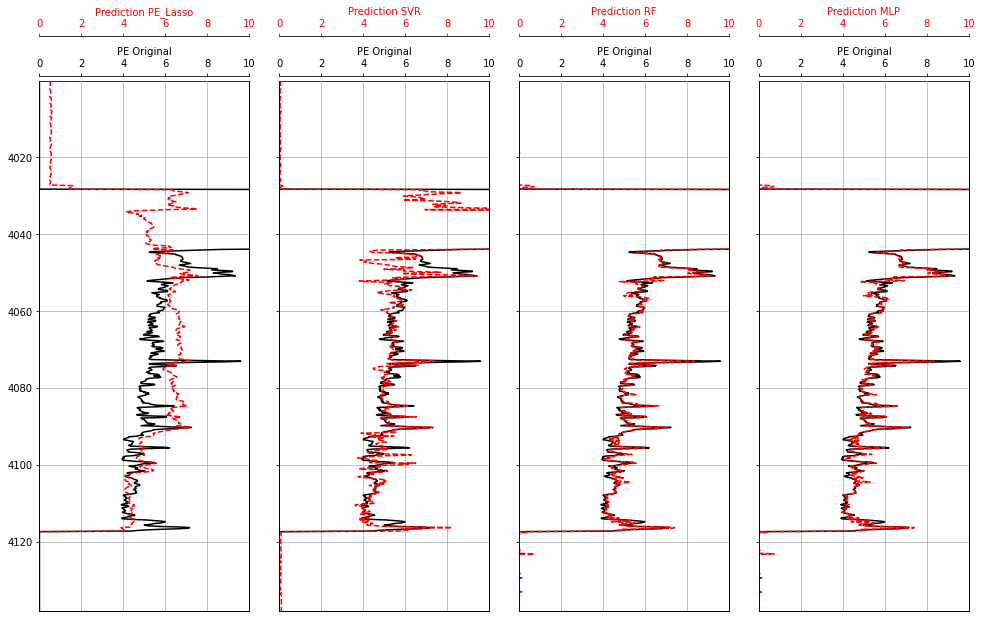

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (14,9), sharey=True)

top_depth = results.Depth.min()
bottom_depth = results.Depth.max()

for axes in ax:
    axes.set_ylim (top_depth, bottom_depth)
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False)

ax01=ax[0].twiny()
ax01.set_xlim(0, 10)
ax01.set_xticks([0, 2, 4, 6, 8, 10])
ax01.plot(results.PE, results.Depth, color='black')
ax01.set_xlabel('PE Original',color='black')    
ax01.tick_params(axis='x', colors='black')
ax01.spines['top'].set_position(('outward',5))
    
ax02=ax[0].twiny()
ax02.set_xlim(0,10)
ax02.set_xticks([0, 2, 4, 6, 8, 10])
ax01.grid(True)
ax02.plot(results.PE_lass, results.Depth, '--', color='red') 
ax02.spines['top'].set_position(('outward',45))
ax02.set_xlabel('Prediction PE_Lasso',color='red')    
ax02.tick_params(axis='x', colors='red')

 # SVR

ax11=ax[1].twiny()
ax11.set_xlim(0, 10)
ax11.set_xticks([0, 2, 4, 6, 8, 10])
ax11.plot(results.PE, results.Depth, color='black')
ax11.set_xlabel('PE Original',color='black')    
ax11.tick_params(axis='x', colors='black')
ax11.spines['top'].set_position(('outward',5))
    
ax12=ax[1].twiny()
ax12.set_xlim(0,10)
ax12.set_xticks([0, 2, 4, 6, 8, 10])
ax11.grid(True)
ax12.plot(results.PE_svr, results.Depth, '--', color='red') 
ax12.spines['top'].set_position(('outward',45))
ax12.set_xlabel('Prediction SVR',color='red')    
ax12.tick_params(axis='x', colors='red')

# RF

ax21=ax[2].twiny()
ax21.set_xlim(0, 10)
ax21.set_xticks([0, 2, 4, 6, 8, 10])
ax21.plot(results.PE, results.Depth, color='black')
ax21.set_xlabel('PE Original',color='black')    
ax21.tick_params(axis='x', colors='black')
ax21.spines['top'].set_position(('outward',5))
    
ax22=ax[2].twiny()
ax22.set_xlim(0,10)
ax22.set_xticks([0, 2, 4, 6, 8, 10])
ax21.grid(True)
ax22.plot(results.PE_rf, results.Depth, '--', color='red') 
ax22.spines['top'].set_position(('outward',45))
ax22.set_xlabel('Prediction RF',color='red')    
ax22.tick_params(axis='x', colors='red')

# MLP

ax31=ax[3].twiny()
ax31.set_xlim(0, 10)
ax31.set_xticks([0, 2, 4, 6, 8, 10])
ax31.plot(results.PE, results.Depth, color='black')
ax31.set_xlabel('PE Original',color='black')    
ax31.tick_params(axis='x', colors='black')
ax31.spines['top'].set_position(('outward',5))
    
ax32=ax[3].twiny()
ax32.set_xlim(0,10)
ax32.set_xticks([0, 2, 4, 6, 8, 10])
ax31.grid(True)
ax32.plot(results.PE_rf, results.Depth, '--', color='red') 
ax32.spines['top'].set_position(('outward',45))
ax32.set_xlabel('Prediction MLP',color='red')    
ax32.tick_params(axis='x', colors='red')

plt.tight_layout(pad = 2.0)